#**Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

In [767]:
import pandas as pd
pd.set_option("display.max_columns",None)
df=pd.read_csv("hotel_bookings.csv")

In [768]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [769]:
df.shape

(119390, 32)

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Detect Duplicated Values**

In [771]:
df.duplicated().sum()

np.int64(31994)

**Detect Missing Values**

In [772]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


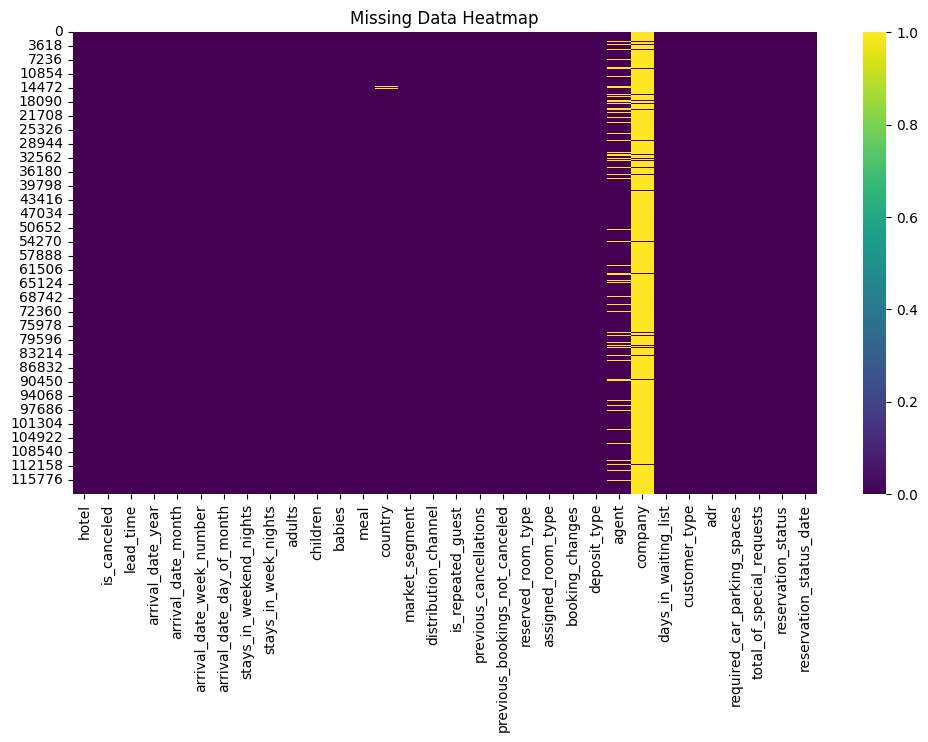

In [773]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [774]:
#identify the percent of missing values in each column
missing_percent=(df.isnull().sum()/len(df))*100
print(missing_percent)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

**Detect Outliers**

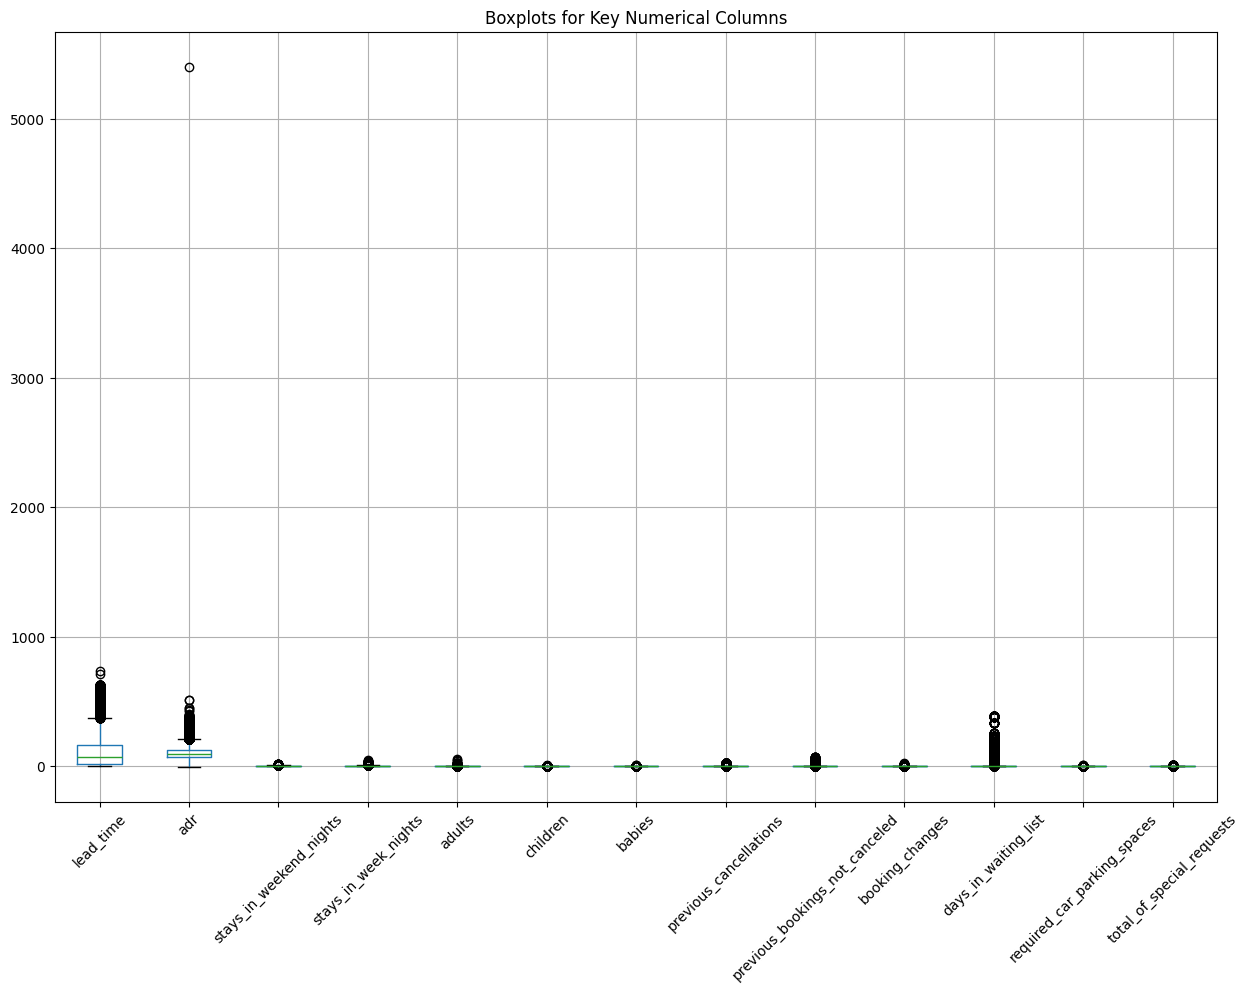

In [775]:
numeric_cols = [
    "lead_time",
    "adr",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "booking_changes",
    "days_in_waiting_list",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.xticks(rotation=45) #for showing the complete name of the column
plt.title("Boxplots for Key Numerical Columns")
plt.show()

In [776]:
def detect_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers_IQR(df, col)
    print(f"{col}: {len(outliers)} outliers")

    if not outliers.empty:
        print("Top 5 largest outlier values:")
        print(outliers[col].sort_values(ascending=False).head(10).values)
        print("\n")
    else:
        print("No outliers detected")

lead_time: 3005 outliers
Top 5 largest outlier values:
[737 709 629 629 629 629 629 629 629 629]


adr: 3793 outliers
Top 5 largest outlier values:
[5400.    510.    508.    451.5   450.    437.    426.25  402.    397.38
  392.  ]


stays_in_weekend_nights: 265 outliers
Top 5 largest outlier values:
[19 18 16 16 16 14 14 13 13 13]


stays_in_week_nights: 3354 outliers
Top 5 largest outlier values:
[50 42 41 40 40 35 34 33 32 30]


adults: 29710 outliers
Top 5 largest outlier values:
[55 50 40 27 27 26 26 26 26 26]


children: 8590 outliers
Top 5 largest outlier values:
[10.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


babies: 917 outliers
Top 5 largest outlier values:
[10  9  2  2  2  2  2  2  2  2]


previous_cancellations: 6484 outliers
Top 5 largest outlier values:
[26 26 26 26 26 26 26 26 26 26]


previous_bookings_not_canceled: 3620 outliers
Top 5 largest outlier values:
[72 71 70 69 68 67 66 65 64 63]


booking_changes: 18076 outliers
Top 5 largest outlier values:
[21 20 18 17 17 16 16

In [777]:
df[(df['babies']==10) | (df['babies']==9)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


#▶**Data Quality Report**

**The Main Quality Issues In Data:**

1.   there are **31994** duplicated values.

2.   **reservation_status_date** column's data type is object not date.


1.   **children** column's data type is float.
2.   **agent** column has **13.68 %** missing values.
2.   **company** column has **94.3 %** missing values.
2.   **country** column has **0.40 %** missing values.
2.   **children** column has **0.003 %** missing values and outlier value 10.


1.   **lead_time** column has many outliers which indicating that some customers book extremely early (up to 300-700 days in advance).

2.  **adr (Average Daily Rate)** column has extreme outliers with very high prices (above 5000).


1.   **days_in_waiting_list** column has some outliers which indicating that a few customers waited an unusually long time before their ressrvation was confirmed.

1. **babies** column has outliers 9 and 10.

1. **booking_changes** column has high values up to 10 times changes.

1. **previous_cancellations**  column has high values up to 25 times changes.











#**Phase 2: Data Cleaning (The Core of the Project)**

**▶  Handle Missing Values:**

In [778]:
# For company and agent Replace missing values with 0.
df['company']=df['company'].fillna(0)
df['agent']=df['agent'].fillna(0)

In [779]:
# for country fill by new category  "unknown"
df['country']=df['country'].fillna('unknown')

In [780]:
# for children fill by mode
df['children']=df['children'].fillna(df['children'].mode()[0])

In [781]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


▶  Remove Duplicates:

In [782]:
df.drop_duplicates(inplace=True)

In [783]:
df.duplicated().sum()

np.int64(0)

In [784]:
df.shape

(87396, 32)

▶ Fix Data Types:

In [785]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [786]:
df['reservation_status_date'].dtype

dtype('<M8[ns]')

In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  babies

In [788]:
df['children']=df['children'].astype('int64')

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

▶ Handle Outliers:

| Column                                | Outlier Issue                                        | Method Applied                           | Justification                                                                                   |
| ------------------------------------- | ---------------------------------------------------- | ---------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **lead\_time**                        | Extremely early bookings (up to 700+ days).          | Capping at 500                           | Bookings beyond 500 days are unrealistic and rare; capping ensures more reliable distributions. |
| **adr (Average Daily Rate)**          | Very high rates (5000+), likely data errors.         | Capping at 1000 + optional log transform | Prevents extreme skewness while still retaining pricing patterns.                               |
| **stays\_in\_weekend\_nights**        | Unusually long stays (16–19 weekends).               | Capping at 10                            | Stays longer than 10 weekends are unrealistic for typical hotel bookings.                       |
| **stays\_in\_week\_nights**           | Very long stays (up to 50 nights).                   | Capping at 20                            | Stays above 20 nights are rare and distort the distribution.                                    |
| **adults**                            | Unrealistic values (e.g., 55 adults in one booking). | Capping at 10                            | A single booking rarely exceeds 10 adults; higher values are likely errors.                     |
| **children**                          | High values (10 children).                           | Capping at 5                             | More than 5 children per booking is unrealistic and considered an outlier.                      |
| **babies**                            | Outliers at 9–10 babies.                             | Capping at 2                             | Having 9–10 babies in a single booking is highly unlikely.                                      |
| **previous\_cancellations**           | Extremely high cancellation counts (26).             | Capping at 10                            | More than 10 cancellations per customer is unrealistic and skews the data.                      |
| **previous\_bookings\_not\_canceled** | Very high counts (up to 72).                         | Capping at 20                            | A customer rarely has more than 20 past confirmed bookings.                                     |
| **booking\_changes**                  | Unusually high values (up to 21).                    | Capping at 10                            | More than 10 booking changes are rare and distort analysis.                                     |
| **days\_in\_waiting\_list**           | Very long waiting times (391 days).                  | Capping at 100                           | Waiting longer than 100 days is not practical for real hotel bookings.                          |
| **required\_car\_parking\_spaces**    | Values up to 8.                                      | Capping at 2                             | Most customers need 0–2 spaces; higher values are unrealistic.                                  |
| **total\_of\_special\_requests**      | Values range from 0–5 (normal).                      | No change needed                         | Special requests up to 5 are reasonable, so no adjustment is required.                          |


In [790]:
# cap lead time at 500
df['lead_time']=df['lead_time'].clip(upper=500)

In [791]:
import numpy as np
# cap adr  at 1000
df['adr']=df['adr'].clip(upper=1000)

In [792]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,0.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [793]:
#change adr -6.38 to 6.38
df.loc[df['adr'] == -6.38, 'adr'] = 6.38

In [794]:
df["adr_log"] = np.log1p(df["adr"] ) # Compresses extreme values and can make distributions more symmetric, improving suitability for modeling

In [795]:
#drop adr column
df.drop('adr',axis=1,inplace=True)

In [796]:
#cap stays in weekend nights at 10
df['stays_in_weekend_nights']=df['stays_in_weekend_nights'].clip(upper=10)

In [797]:
#cap stays in weekend nights at 20
df['stays_in_week_nights']=df['stays_in_week_nights'].clip(upper=20)

In [798]:
#cap adults at 10
df['adults']=df['adults'].clip(upper=10)

In [799]:
#cap children at 5
df['children']=df['children'].clip(upper=5)

In [800]:
#cap babies at 2
df['babies']=df['babies'].clip(upper=2)

In [801]:
#cap waiting list at 100
df['days_in_waiting_list']=df['days_in_waiting_list'].clip(upper=100)

In [802]:
#cap required car parking space at 2
df['required_car_parking_spaces']=df['required_car_parking_spaces'].clip(upper=2)

In [803]:
#cap previous cancellations at 10
df['previous_cancellations']=df['previous_cancellations'].clip(upper=10)

In [804]:
#cap previous bookings not cancelled at 20
df['previous_bookings_not_canceled']=df['previous_bookings_not_canceled'].clip(upper=20)

In [805]:
#cap booking changes at 10
df['booking_changes']=df['booking_changes'].clip(upper=10)

In [806]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status_date,adr_log
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396,87396.000000
mean,0.274898,79.844627,2016.210296,26.838334,15.815541,1.004554,2.622077,1.872946,0.138576,0.010653,0.039075,0.028846,0.163051,0.270333,81.004657,11.016809,0.581331,0.084054,0.698567,2016-08-31 03:44:08.963339520,4.495006
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2016-03-18 00:00:00,4.290459
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,2016-09-08 00:00:00,4.596129
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,0.000000,1.000000,2017-03-05 00:00:00,4.905275
max,1.000000,500.000000,2017.000000,53.000000,31.000000,10.000000,20.000000,10.000000,5.000000,2.000000,1.000000,10.000000,20.000000,10.000000,535.000000,543.000000,100.000000,2.000000,5.000000,2017-09-14 00:00:00,6.908755
std,0.446466,85.798386,0.686102,13.674572,8.835146,1.023865,2.013640,0.520457,0.454947,0.104539,0.193775,0.298714,1.248020,0.704672,109.945638,54.047484,6.674290,0.278828,0.831946,NaN,0.806025


#**Phase 3: Feature Engineering & Preprocessing**

#▶**Create New Features**

In [807]:
is_family = (df['children'] > 0) | (df['babies'] > 0)
df['is_family'] = is_family.map({True: 'Yes', False: 'No'})

In [808]:
total_guests=df['adults']+df['children']+df['babies']
df['total_guests']=total_guests

In [809]:
df.drop(['adults','children','babies'],axis=1,inplace=True)

In [810]:
total_nights=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['total_nights']=total_nights

In [811]:
df.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1,inplace=True)

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   meal                            87396 non-null  object        
 8   country                         87396 non-null  object        
 9   market_segment                  87396 non-null  object        
 10  distribution_channel            87396 non-null  object        
 11  is_rep

#▶**Encode Categorical Variable**

Apply One Hot Encoding for Nominal Categories (order is not important)




In [813]:
low_cardinality_cols = ['meal', 'market_segment', 'distribution_channel','hotel','customer_type','is_family','deposit_type','is_repeated_guest',]
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

Apply Label Encoder for Ordinal Categories (order is important)

In [814]:
#label encoder for reserved room and assigned room type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['reserved_room_type']=le.fit_transform(df['reserved_room_type'])
df['assigned_room_type']=le.fit_transform(df['assigned_room_type'])

**Apply Frequency Encoder for multipule categories**

In [815]:
country_counts = df['country'].value_counts()
agent_counts = df['agent'].value_counts()
company_counts = df['company'].value_counts()
df['company_freq'] = df['company'].map(company_counts)
df['agent_freq']=df['agent'].map(agent_counts)
df['country_freq'] = df['country'].map(country_counts)

In [816]:
df.drop(['agent','company','country'],axis=1,inplace=True)

**Mapping month as numbers instead of string**

In [817]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month_num'] = df['arrival_date_month'].map(month_map)

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     87396 non-null  int64         
 1   lead_time                       87396 non-null  int64         
 2   arrival_date_year               87396 non-null  int64         
 3   arrival_date_month              87396 non-null  object        
 4   arrival_date_week_number        87396 non-null  int64         
 5   arrival_date_day_of_month       87396 non-null  int64         
 6   previous_cancellations          87396 non-null  int64         
 7   previous_bookings_not_canceled  87396 non-null  int64         
 8   reserved_room_type              87396 non-null  int64         
 9   assigned_room_type              87396 non-null  int64         
 10  booking_changes                 87396 non-null  int64         
 11  days_i

In [819]:
df.drop('arrival_date_month',axis=1,inplace=True)

In [820]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   is_canceled                     87396 non-null  int64         
 1   lead_time                       87396 non-null  int64         
 2   arrival_date_year               87396 non-null  int64         
 3   arrival_date_week_number        87396 non-null  int64         
 4   arrival_date_day_of_month       87396 non-null  int64         
 5   previous_cancellations          87396 non-null  int64         
 6   previous_bookings_not_canceled  87396 non-null  int64         
 7   reserved_room_type              87396 non-null  int64         
 8   assigned_room_type              87396 non-null  int64         
 9   booking_changes                 87396 non-null  int64         
 10  days_in_waiting_list            87396 non-null  int64         
 11  requir

#**Data Splitting**

 Remove Data Leakage by dropping the columns **reservation_status** and
 **reservation_status_date** which contain information that would not be available at the time of prediction and would make the model useless in a real-world scenario

In [821]:
df.drop(['reservation_status','reservation_status_date'],axis=1,inplace=True)

In [822]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  int64  
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_week_number        87396 non-null  int64  
 4   arrival_date_day_of_month       87396 non-null  int64  
 5   previous_cancellations          87396 non-null  int64  
 6   previous_bookings_not_canceled  87396 non-null  int64  
 7   reserved_room_type              87396 non-null  int64  
 8   assigned_room_type              87396 non-null  int64  
 9   booking_changes                 87396 non-null  int64  
 10  days_in_waiting_list            87396 non-null  int64  
 11  required_car_parking_spaces     87396 non-null  int64  
 12  total_of_special_requests       8739

In [823]:
from sklearn.model_selection import train_test_split
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']

split 80 % for train and 20 % for test

In [824]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)